# Exercise 7

# Capital Bikeshare data

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [2]:
# read the data and set "datetime" as the index
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [3]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)

In [4]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour

In [5]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [6]:
bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

# Exercise 7.1

Run these two `groupby` statements and figure out what they tell you about the data.

In [7]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [8]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

Básicamente los datos nos dicen que no hay diferencias grandes entre los tipos de días [0, 1] pero, por el contrario, la hora es un factor importante para el total de bicicletas; ya que entre las 8am (8 horas) y las 7pm (19 horas) es el lapso de tiempo en el que más demanda de bicicletas hay.

# Exercise 7.2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

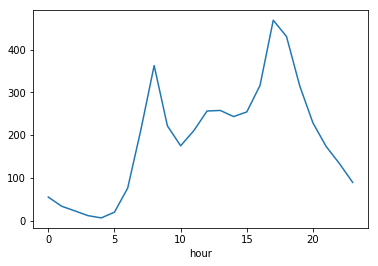

In [9]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot()

Plot for workingday == 0 and workingday == 1

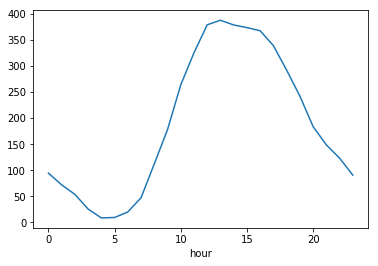

In [10]:
# hourly rental trend for "workingday=0"
bikes[bikes.workingday==0].groupby('hour').total.mean().plot()

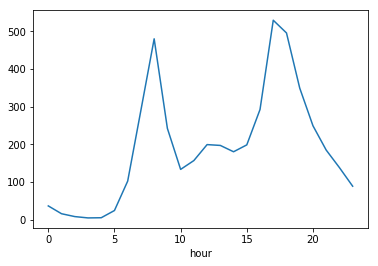

In [11]:
# hourly rental trend for "workingday=1"
bikes[bikes.workingday==1].groupby('hour').total.mean().plot()

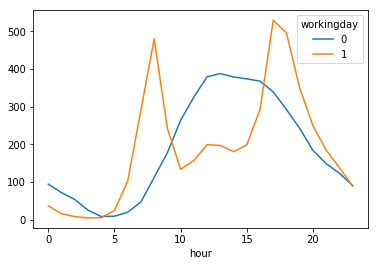

In [12]:
# combine the two plots
bikes.groupby(['hour', 'workingday']).total.mean().unstack().plot()

Estos gráficos nos permiten aprovhecar de mejor manera la importancia de la hora en el análisis, ya que para los días hábiles de 7am a 9am y de 4pm a 7pm se encuentra la mayor demanda; por su parte los días no hábiles el mayor consumo se ve entre 11am y 5pm. Además de lo anterior, vemos que entre las 0 horas y las 4am el consumo los días no hábiles es considerablemente mayor.

# Exercise 7.3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

In [13]:
linreg = LinearRegression(normalize=True)

var_x = ['hour', 'workingday']
X = bikes[var_x]
y = bikes['total']

X['workingday'] = X['workingday'].astype('category')
X['hour'] = X['hour'].astype('category')

linreg.fit(X, y)

linreg_coef = [0]
linreg_coef[0] = linreg.intercept_
linreg_coef_ = linreg.coef_
linreg_coef.append(linreg_coef_)
linreg_coef = pd.DataFrame(linreg_coef, columns = ['Beta'])
linreg_coef.T

C:\Users\Cristian Najera Leal\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Cristian Najera Leal\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,0,1
Beta,67.706,"[10.49206282289372, 4.0724862729043805]"


El intercepto es demasiado grande frente a los demás coeficientes, por lo tanto cualquier predicción de este modelo se verá sesgado por el.

# Exercice 7.4

Create a Decision Tree to forecast "total" by manually iterating over the features "hour" and "workingday". The algorithm must at least have 6 end nodes.

In [14]:
data = pd.DataFrame(bikes)
def error_workingday(data, workingday):
    data['pred'] = data.loc[data.workingday == workingday, 'total'].mean()
    data.loc[data.workingday==workingday, 'total'] = data.loc[data.workingday==workingday, 'total'].mean()
    return ((((data['total'] - data['pred'])**2).mean()) ** 0.5)
def error_hora(data, hour):
    data['pred'] = data.loc[data.hour <hour, 'total'].mean()
    data.loc[data.hour>=hour, 'pred'] = data.loc[data.hour>=hour, 'total'].mean()
    return ((((data['total'] - data['pred'])**2).mean()) ** 0.5)

In [15]:
rmse = []
for hora in data.hour.unique():
    rmse.append([hora, error_hora(data, hora)])
rmse=pd.DataFrame(rmse,columns=['Hora','RMSE'])
print(rmse.loc[rmse['RMSE'].idxmin()])

Hora      7.000000
RMSE    150.225601
Name: 7, dtype: float64


In [16]:
rmse = []
for dia in data.workingday.unique():
    rmse.append([dia, error_workingday(data, dia)])
rmse=pd.DataFrame(rmse,columns=['WDay','RMSE'])
print(rmse.loc[rmse['RMSE'].idxmin()])

WDay    1.000000
RMSE    2.545071
Name: 1, dtype: float64


In [17]:
data_izq = data.loc[data.hour<7].copy()

In [18]:
data_der = data.loc[data.hour>=7].copy()

In [19]:
rmse = []
for hora in data_izq.hour.unique():
    rmse.append([hora, error_hora(data_izq, hora)])
rmse=pd.DataFrame(rmse,columns=['Hora','RMSE'])
print(rmse.loc[rmse['RMSE'].idxmin()])

Hora    5.000000
RMSE    2.104035
Name: 5, dtype: float64


In [20]:
rmse = []
for dia in data_izq.workingday.unique():
    rmse.append([dia, error_workingday(data_izq, dia)])
rmse=pd.DataFrame(rmse,columns=['WDay','RMSE'])
print(rmse.loc[rmse['RMSE'].idxmin()])

WDay    1.000000
RMSE    2.554283
Name: 1, dtype: float64


In [21]:
rmse = []
for hora in data_der.hour.unique():
    rmse.append([hora, error_hora(data_der, hora)])
rmse=pd.DataFrame(rmse,columns=['Hora','RMSE'])
print(rmse.loc[rmse['RMSE'].idxmin()])

Hora    12.000000
RMSE     2.098423
Name: 5, dtype: float64


In [22]:
rmse = []
for dia in data_der.workingday.unique():
    rmse.append([dia, error_workingday(data_der, dia)])
rmse=pd.DataFrame(rmse,columns=['WDay','RMSE'])
print(rmse.loc[rmse['RMSE'].idxmin()])

WDay    1.000000
RMSE    2.541328
Name: 1, dtype: float64


In [23]:
data_izq_izq = data_izq.loc[data_izq.hour<5].copy()

In [24]:
data_izq_der = data_izq.loc[data_izq.hour>=5].copy()

In [25]:
rmse = []
for hora in data_izq_izq.hour.unique():
    rmse.append([hora, error_hora(data_izq_izq, hora)])
rmse=pd.DataFrame(rmse,columns=['Hora','RMSE'])
print(rmse.loc[rmse['RMSE'].idxmin()])

Hora    3.000000
RMSE    2.107426
Name: 3, dtype: float64


In [26]:
rmse = []
for dia in data_izq_izq.workingday.unique():
    rmse.append([dia, error_workingday(data_izq_izq, dia)])
rmse=pd.DataFrame(rmse,columns=['WDay','RMSE'])
print(rmse.loc[rmse['RMSE'].idxmin()])

WDay    1.000000
RMSE    2.562363
Name: 1, dtype: float64


In [27]:
rmse = []
for hora in data_izq_der.hour.unique():
    rmse.append([hora, error_hora(data_izq_der, hora)])
rmse=pd.DataFrame(rmse,columns=['Hora','RMSE'])
print(rmse.loc[rmse['RMSE'].idxmin()])

Hora    6.000000
RMSE    2.095287
Name: 1, dtype: float64


In [28]:
rmse = []
for dia in data_izq_der.workingday.unique():
    rmse.append([dia, error_workingday(data_izq_der, dia)])
rmse=pd.DataFrame(rmse,columns=['WDay','RMSE'])
print(rmse.loc[rmse['RMSE'].idxmin()])

WDay    1.000000
RMSE    2.534291
Name: 1, dtype: float64


In [29]:
data_der_izq = data_der.loc[data_der.hour<12].copy()

In [30]:
data_der_der = data_der.loc[data_der.hour>=12].copy()

In [31]:
rmse = []
for dia in data_der_izq.workingday.unique():
    rmse.append([dia, error_workingday(data_der_izq, dia)])
rmse=pd.DataFrame(rmse,columns=['WDay','RMSE'])
print(rmse.loc[rmse['RMSE'].idxmin()])

WDay    1.000000
RMSE    2.543299
Name: 1, dtype: float64


In [32]:
rmse = []
for hora in data_der_izq.hour.unique():
    rmse.append([hora, error_hora(data_der_izq, hora)])
rmse=pd.DataFrame(rmse,columns=['Hora','RMSE'])
print(rmse.loc[rmse['RMSE'].idxmin()])

Hora    9.000000
RMSE    2.099291
Name: 2, dtype: float64


In [33]:
rmse = []
for dia in data_der_der.workingday.unique():
    rmse.append([dia, error_workingday(data_der_der, dia)])
rmse=pd.DataFrame(rmse,columns=['WDay','RMSE'])
print(rmse.loc[rmse['RMSE'].idxmin()])

WDay    1.000000
RMSE    2.540509
Name: 1, dtype: float64


In [34]:
rmse = []
for hora in data_der_der.hour.unique():
    rmse.append([hora, error_hora(data_der_der, hora)])
rmse=pd.DataFrame(rmse,columns=['Hora','RMSE'])
print(rmse.loc[rmse['RMSE'].idxmin()])

Hora    12.000000
RMSE     2.098063
Name: 0, dtype: float64


In [35]:
data_izq_izq_izq = data_izq_izq.loc[data_izq_izq.hour<3].copy()

In [36]:
data_izq_izq_der = data_izq_izq.loc[data_izq_izq.hour>=3].copy()

In [37]:
data_der_der_izq = data_der_der.loc[data_der_der.workingday==0].copy()

In [38]:
data_der_der_der = data_der_der.loc[data_der_der.workingday==1].copy()

In [39]:
nodos_finales = [data_der_izq,data_izq_izq_izq,data_izq_izq_der,
                data_izq_der,data_der_der_izq,data_der_der_der]
for i in range(0,6):
    a = nodos_finales[i]
    print('Para el caso de las horas', a.hour.unique(), 'y los tipos de día ', a.workingday.unique(), ', el total de bicicletas es ', round(a.total.mean(), 4))

Para el caso de las horas [ 7  8  9 10 11] y los tipos de día  [0 1] , el total de bicicletas es  191.5761
Para el caso de las horas [0 1 2] y los tipos de día  [0 1] , el total de bicicletas es  191.5743
Para el caso de las horas [3 4] y los tipos de día  [0 1] , el total de bicicletas es  191.5239
Para el caso de las horas [5 6] y los tipos de día  [0 1] , el total de bicicletas es  191.5863
Para el caso de las horas [12 13 14 15 16 17 18 19 20 21 22 23] y los tipos de día  [0] , el total de bicicletas es  188.5066
Para el caso de las horas [12 13 14 15 16 17 18 19 20 21 22 23] y los tipos de día  [1] , el total de bicicletas es  193.0119


# Exercise 7.5

Train a Decision Tree using scikit-learn. Comment about the performance of the models.

In [40]:
treereg = DecisionTreeRegressor(criterion='mse', max_depth=6)
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

106.30130069442295

In [41]:
treereg.fit(X,y)
export_graphviz(treereg, out_file='2_var_depth_6.dot', feature_names=list(X.columns))

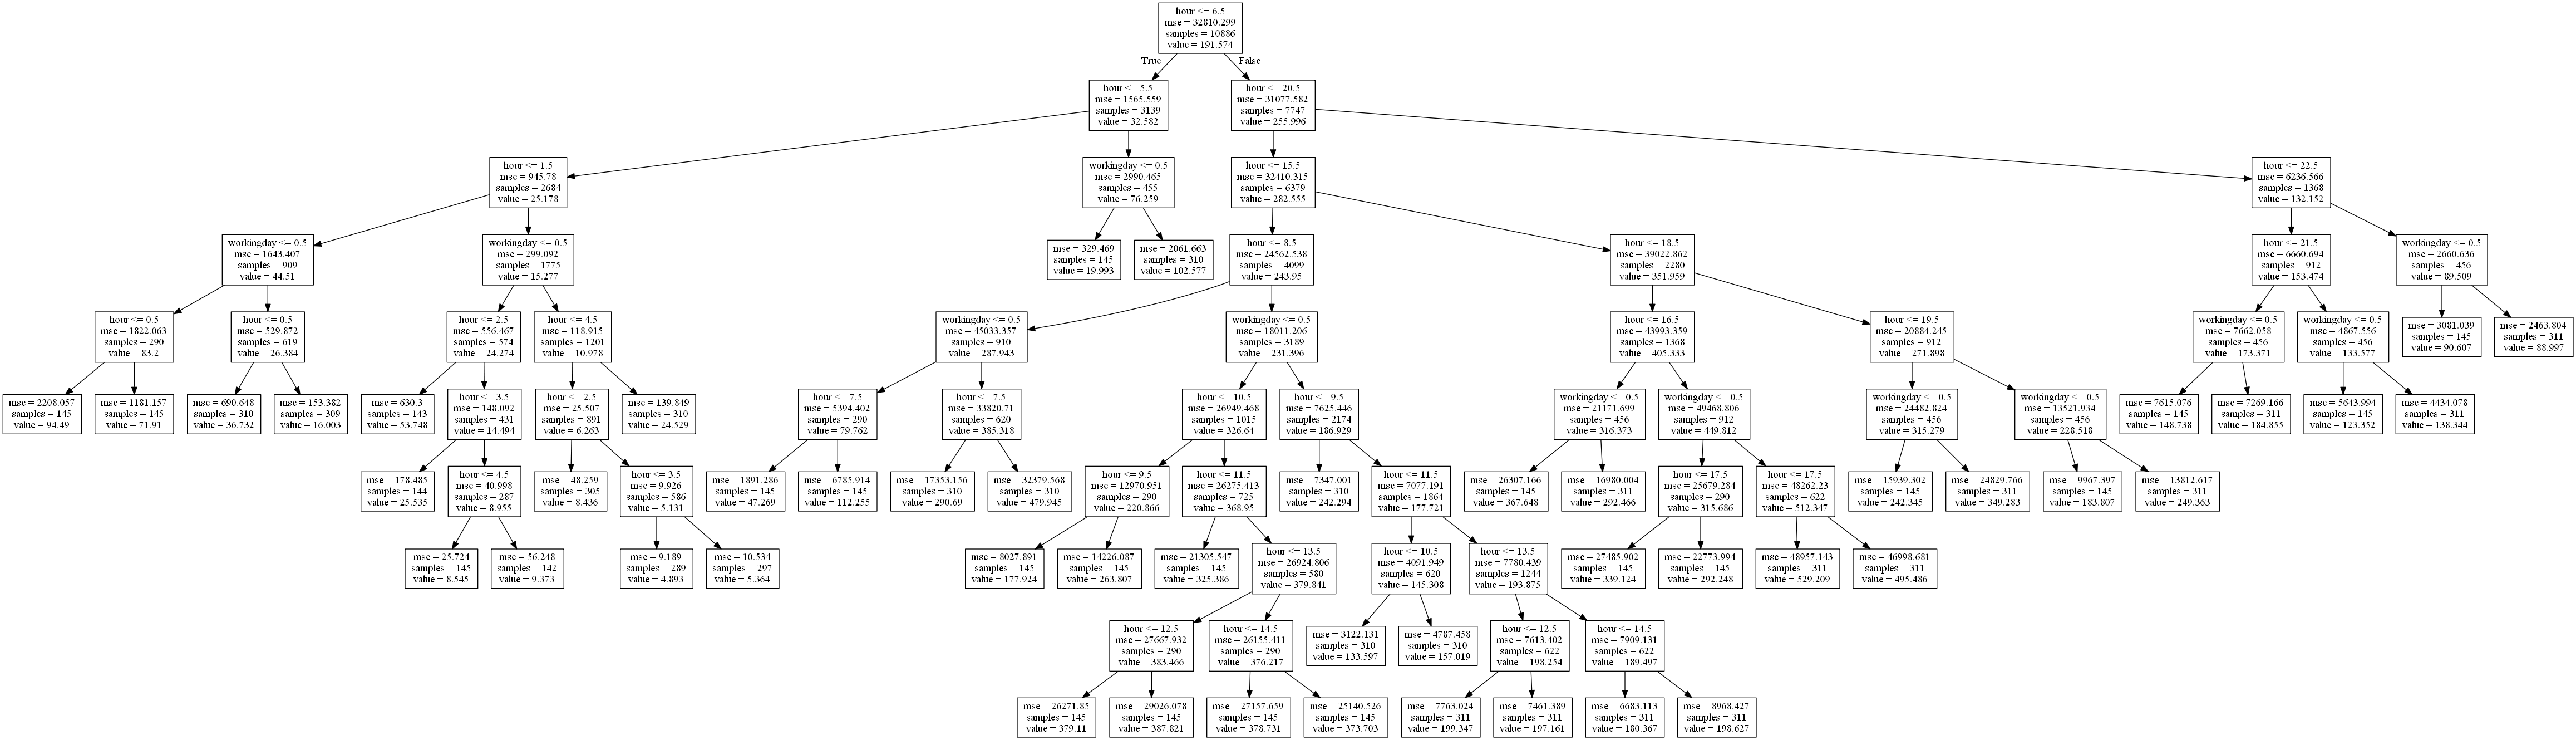

In [59]:
from IPython.display import Image
Image("C:/Users/Cristian Najera Leal/Documents/UniAndes/Semestre 2/Machine Learning/PracticalMachineLearningClass/exercises/2_var_depth_6.png")

In [42]:
# list of values to try
max_depth_range = range(1,15,1)

# list to store the average RMSE for each value of max_depth
depth_ = []
RMSE_scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(criterion='mse',max_depth=depth)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    depth_.append(depth)
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0,0.5,'RMSE (lower is better)')

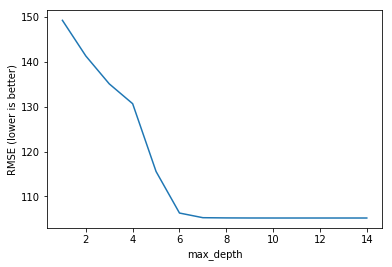

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [44]:
a = pd.DataFrame(depth_, columns = ['Depth'])
b = pd.DataFrame(RMSE_scores, columns = ['RMSE'])
a = a.join(b)
print(a.loc[a['RMSE'].idxmin()])

Depth     10.000000
RMSE     105.192447
Name: 9, dtype: float64


In [45]:
treereg = DecisionTreeRegressor(criterion='mse', max_depth=10)
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

105.19244713068338

In [46]:
treereg.fit(X,y)
export_graphviz(treereg, out_file='2_var_depth_10.dot', feature_names=list(X.columns))

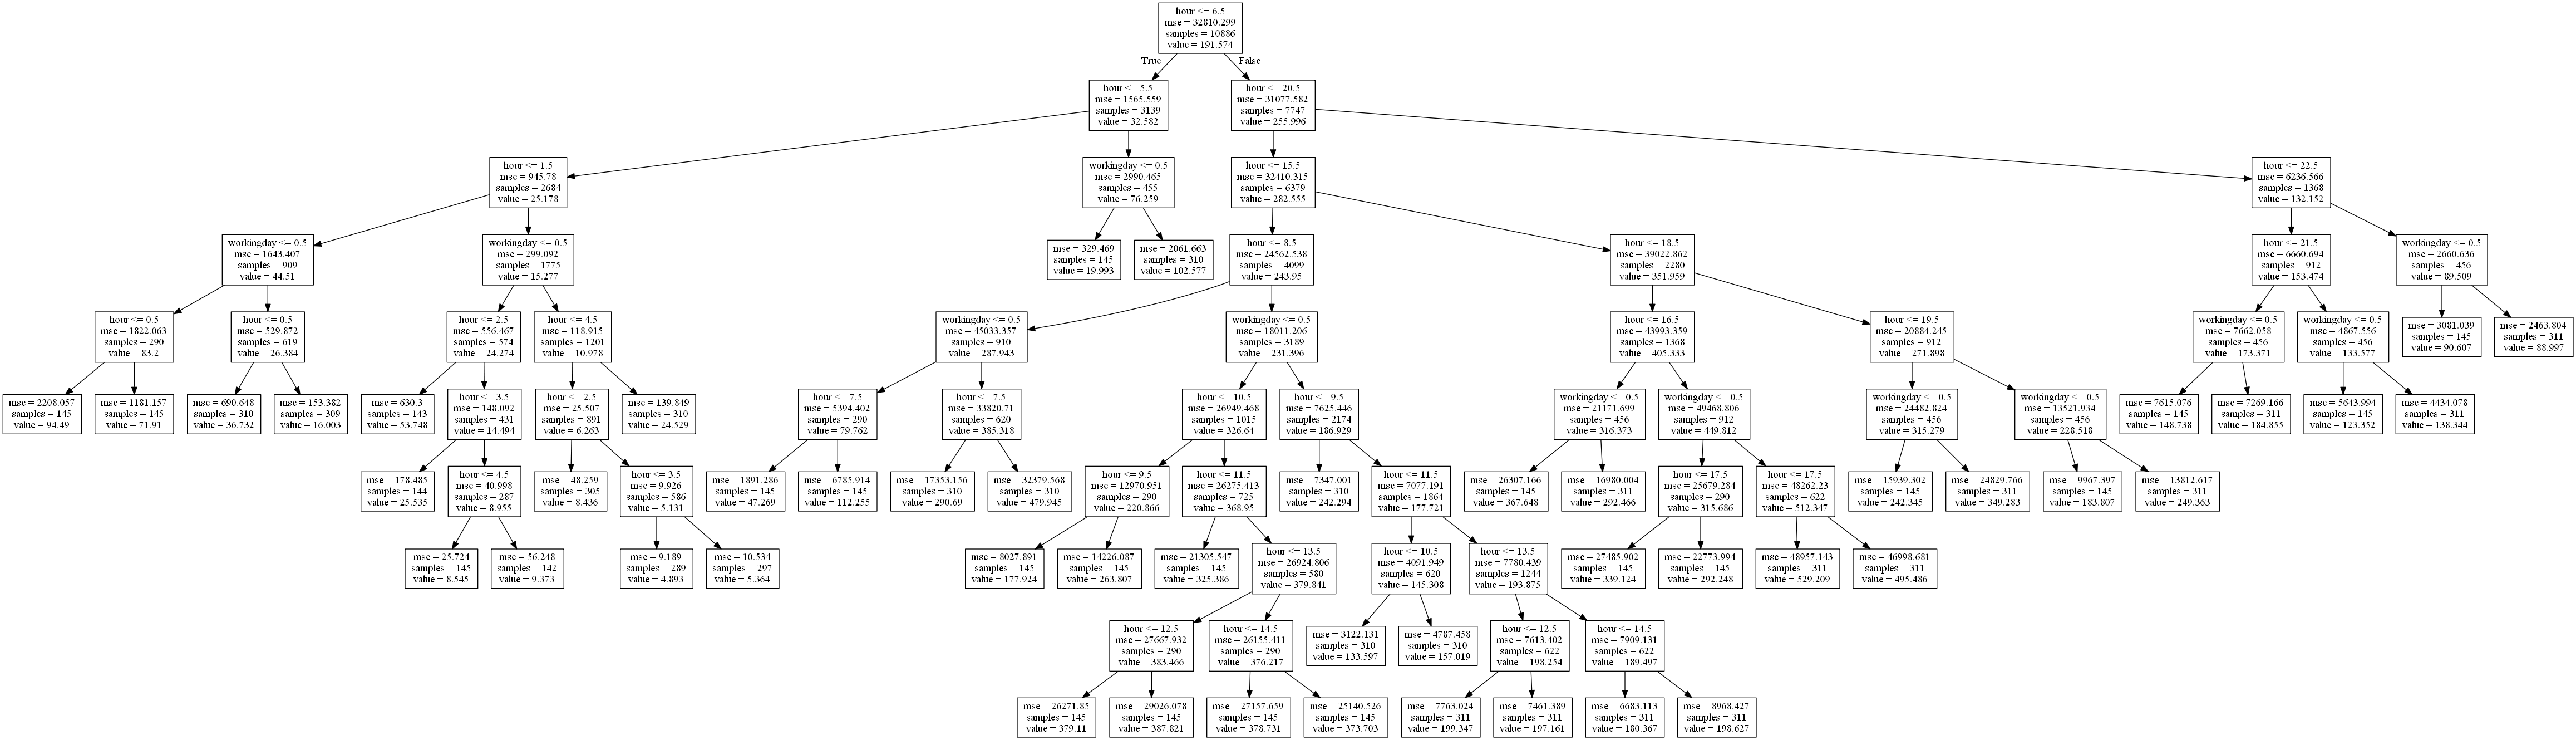

In [60]:
Image("C:/Users/Cristian Najera Leal/Documents/UniAndes/Semestre 2/Machine Learning/PracticalMachineLearningClass/exercises/2_var_depth_10.png")

### Con más variables

In [47]:
var_x_arbol = bikes.columns.values.tolist()
var_x_arbol.remove('total')
var_x_arbol.remove('holiday')
var_x_arbol.remove('atemp')

X_arbol = bikes[var_x_arbol]
X_arbol['hour'] = X_arbol['hour'].astype('category')
X_arbol['season'] = X_arbol['season'].astype('category')
X_arbol['workingday'] = X_arbol['workingday'].astype('category')
X_arbol['weather'] = X_arbol['weather'].astype('category')
y_arbol = bikes['total']

var_x_arbol

C:\Users\Cristian Najera Leal\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Cristian Najera Leal\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Cristian Najera Leal\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:/

['season',
 'workingday',
 'weather',
 'temp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'hour',
 'pred']

In [48]:
scores = cross_val_score(treereg, X_arbol, y_arbol, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

6.608077068368097

In [49]:
# list of values to try
max_depth_range = range(1,15,1)

# list to store the average RMSE for each value of max_depth
depth_ = []
RMSE_scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(criterion='mse',max_depth=depth)
    MSE_scores = cross_val_score(treereg, X_arbol, y_arbol, cv=14, scoring='neg_mean_squared_error')
    depth_.append(depth)
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0,0.5,'RMSE (lower is better)')

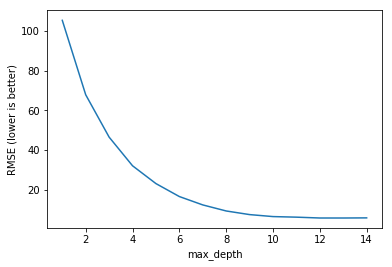

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [51]:
a = pd.DataFrame(depth_, columns = ['Depth'])
b = pd.DataFrame(RMSE_scores, columns = ['RMSE'])
a = a.join(b)
print(a.loc[a['RMSE'].idxmin()])

Depth    13.000000
RMSE      5.907368
Name: 12, dtype: float64


In [52]:
treereg = DecisionTreeRegressor(criterion='mse', max_depth=14)
scores = cross_val_score(treereg, X_arbol, y_arbol, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

5.898671087991809

In [53]:
treereg.fit(X_arbol,y_arbol)
export_graphviz(treereg, out_file='10_var_depth_14.dot', feature_names=list(X_arbol.columns))

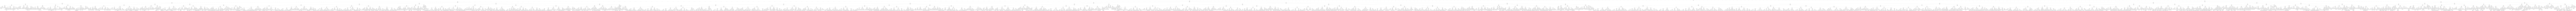

In [61]:
Image("C:/Users/Cristian Najera Leal/Documents/UniAndes/Semestre 2/Machine Learning/PracticalMachineLearningClass/exercises/10_var_depth_14.png")